In [121]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt


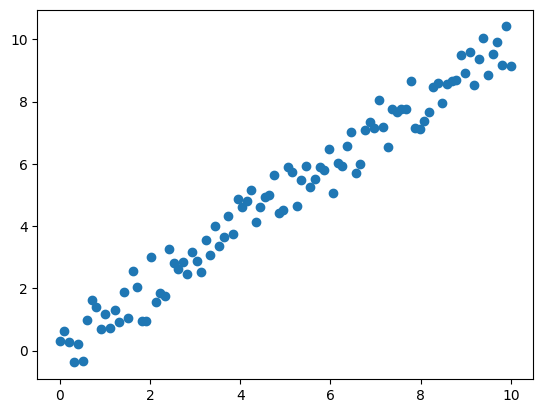

In [122]:
xs1 = np.linspace(0, 10, 100)
ys1 = xs + np.random.random(100)*2-1

plt.scatter(xs1, ys1)
plt.show()

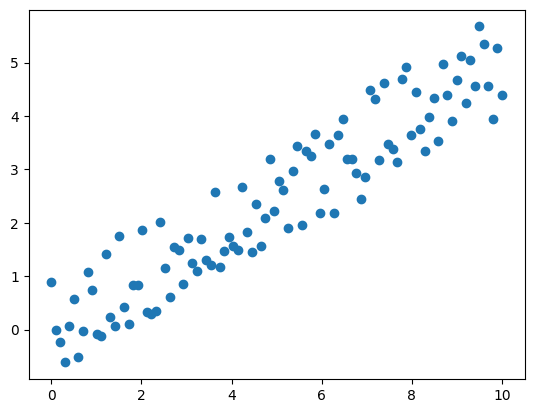

In [123]:
xs2 = np.linspace(0, 10, 100)
ys2 = xs/2 + np.random.random(100)*2-1

plt.scatter(xs2, ys2)
plt.show()

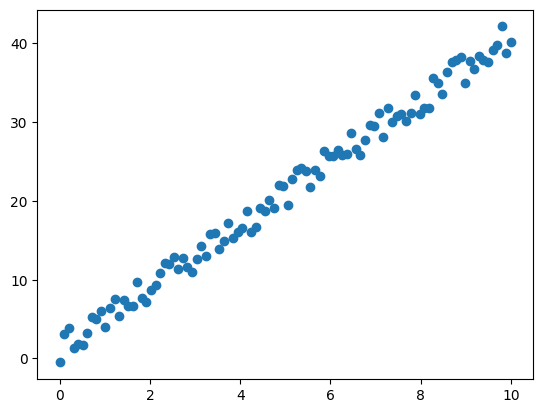

In [124]:
xs3 = np.linspace(0, 10, 100)
ys3 = xs*4 + np.random.random(100)*4-1

plt.scatter(xs3, ys3)
plt.show()

In [125]:
def ModelOut(xs, ys):
  # Делим данные на обучающую и тестовую выборки
  X_train, X_test, y_train, y_test = train_test_split(xs.reshape(-1, 1), ys.reshape(-1, 1), test_size=0.2, random_state=42)

    # Создание и обучение модели
  model = LinearRegression()
  model.fit(X_train, y_train)

  # Предсказание на тестовой выборке
  y_pred = model.predict(X_test)

  # Оценка качества модели
  print("Коэффициенты:", model.coef_)
  print("Свободный член:", model.intercept_)
  print("Среднеквадратичная ошибка:", mean_squared_error(y_test, y_pred))
  print("Коэффициент детерминации R^2:", r2_score(y_test, y_pred))

  # Визуализация
  plt.scatter(X_test, y_test, color='blue', label='Фактические данные')
  plt.plot(X_test, y_pred, color='red', linewidth=2, label='Линия регрессии')
  plt.xlabel("X")
  plt.ylabel("y")
  plt.title("Линейная регрессия с использованием sklearn")
  plt.legend()
  plt.show()
  return model

Коэффициенты: [[0.96787702]]
Свободный член: [0.17992689]
Среднеквадратичная ошибка: 0.2954368036109745
Коэффициент детерминации R^2: 0.968678317704503


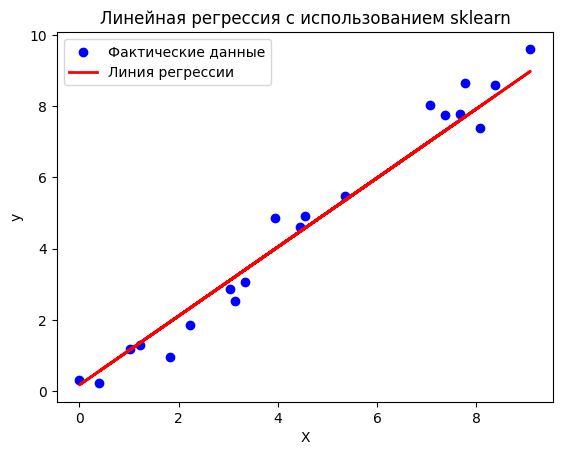

LinearRegression()

In [126]:
ModelOut(xs1, ys1)



Коэффициенты: [[0.51569669]]
Свободный член: [-0.21178298]
Среднеквадратичная ошибка: 0.38293109192029307
Коэффициент детерминации R^2: 0.8605359057240063


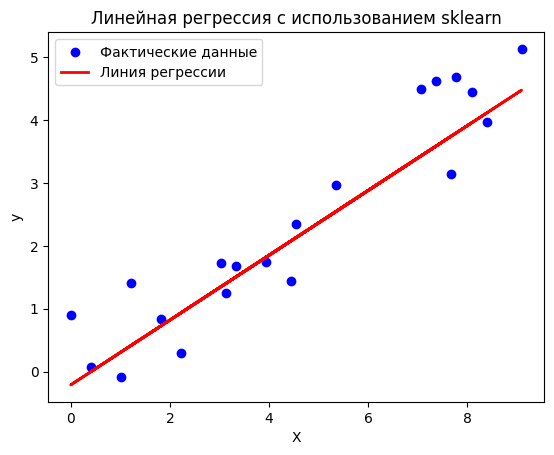

LinearRegression()

In [127]:
ModelOut(xs2, ys2)

Коэффициенты: [[3.95092071]]
Свободный член: [1.33646654]
Среднеквадратичная ошибка: 1.2775328172132625
Коэффициент детерминации R^2: 0.9903494492153847


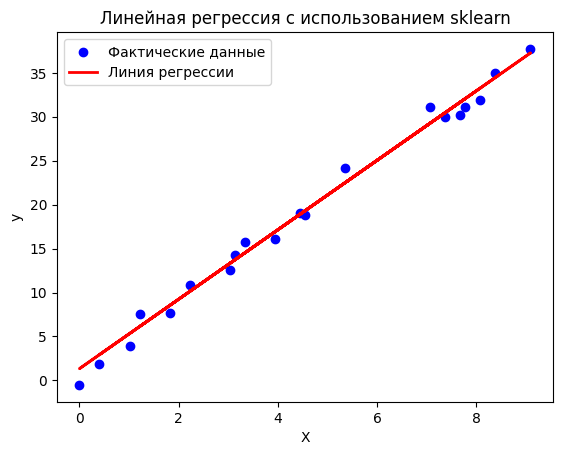

LinearRegression()

In [128]:
ModelOut(xs3, ys3)

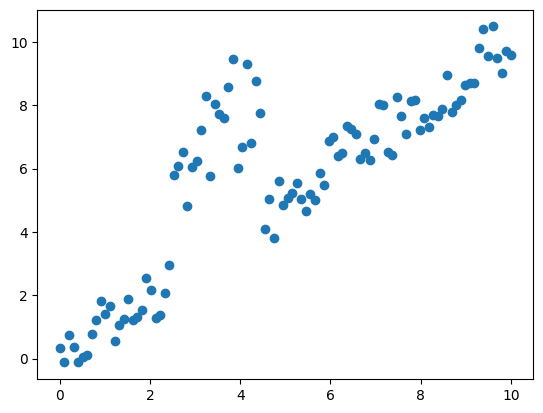

In [129]:
xs4 = np.linspace(0, 10, 100)
ys4 = xs + np.random.random(100)*2-1
ys4[25:45] *= 2

plt.scatter(xs, ys)
plt.show()

Коэффициенты: [[0.89150441]]
Свободный член: [1.17018908]
Среднеквадратичная ошибка: 2.308512043814045
Коэффициент детерминации R^2: 0.7394871989212122


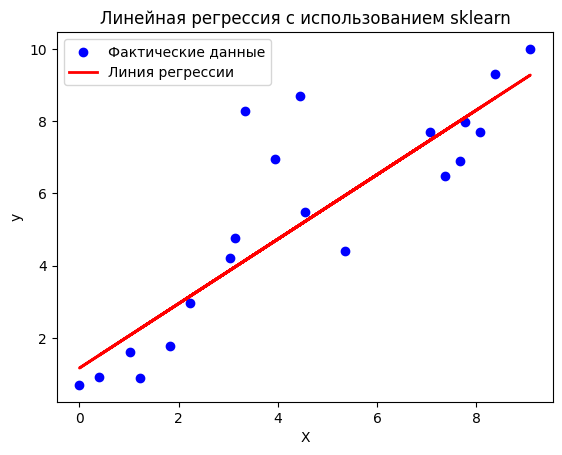

LinearRegression()

In [130]:
ModelOut(xs4, ys4)

In [131]:
%%writefile model.py

import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

def ModelOut(xs, ys):
  # Делим данные на обучающую и тестовую выборки
  X_train, X_test, y_train, y_test = train_test_split(xs.reshape(-1, 1), ys.reshape(-1, 1), test_size=0.2, random_state=42)

    # Создание и обучение модели
  model = LinearRegression()
  model.fit(X_train, y_train)

  # Предсказание на тестовой выборке
  y_pred = model.predict(X_test)
  r2coeff = r2_score(y_test, y_pred)

  mse = mean_squared_error(y_test, y_pred)
  # Оценка качества модели
  print("Коэффициенты:", model.coef_)
  print("Свободный член:", model.intercept_)
  print("Среднеквадратичная ошибка:", mse)
  print("Коэффициент детерминации R^2:", r2coeff)

  # Визуализация
  plt.scatter(X_test, y_test, color='blue', label='Фактические данные')
  plt.plot(X_test, y_pred, color='red', linewidth=2, label='Линия регрессии')
  plt.xlabel("X")
  plt.ylabel("y")
  plt.title("Линейная регрессия с использованием sklearn")
  plt.legend()
  plt.show()
  return model, y_test, y_pred, mse, r2coeff



Overwriting model.py


In [132]:
%%writefile test_model.py

import numpy as np
from model import ModelOut

def test_data_dataset_1():
    xs1 = np.linspace(0, 10, 100)
    ys1 = xs1 + np.random.random(100)*2-1

    model, y_test, y_pred, mse, r2coeff = ModelOut(xs1, ys1)
    assert r2coeff > 0.8, f"R2 слишком низкий, модель не подходит для данного датасета: {r2coeff}"
    assert mse < 1.5, f"MSE слишком высок, модель не подходит для данного датасета: {mse}"

def test_data_dataset_2():
    xs2 = np.linspace(0, 10, 100)
    ys2 = xs2/2 + np.random.random(100)*2-1

    model, y_test, y_pred, mse, r2coeff = ModelOut(xs2, ys2)
    assert r2coeff > 0.8, f"R2 слишком низкий, модель не подходит для данного датасета: {r2coeff}"
    assert mse < 1.5, f"MSE слишком высок, модель не подходит для данного датасета: {mse}"

def test_data_dataset_3():
    xs3 = np.linspace(0, 10, 100)
    ys3 = xs3*4 + np.random.random(100)*4-1

    model, y_test, y_pred, mse, r2coeff = ModelOut(xs3, ys3)
    assert r2coeff > 0.8, f"R2 слишком низкий, модель не подходит для данного датасета: {r2coeff}"
    assert mse < 1.5, f"MSE слишком высок, модель не подходит для данного датасета: {mse}"

def test_data_dataset_4():
    xs4 = np.linspace(0, 10, 100)
    ys4 = xs4 + np.random.random(100)*2-1
    ys4[25:45] *= 2

    model, y_test, y_pred, mse, r2coeff = ModelOut(xs4, ys4)
    assert r2coeff > 0.9, f"R2 слишком низкий, модель не подходит для данного датасета: {r2coeff}"
    assert mse < 1.5, f"MSE слишком высок, модель не подходит для данного датасета: {mse}"

Overwriting test_model.py


In [133]:
!pip -q install pytest pytest-sugar

In [134]:
!python -m pytest test_model.py

Test session starts (platform: linux, Python 3.11.13, pytest 8.3.5, pytest-sugar 1.0.0)
rootdir: /content/tdd
plugins: sugar-1.0.0, langsmith-0.3.44, typeguard-4.4.2, anyio-4.9.0
collected 4 items                                                              

 test_model.py ✓✓✓                                                75% ███████▌  

――――――――――――――――――――――――――――― test_data_dataset_4 ――――――――――――――――――――――――――――――

    def test_data_dataset_4():
        xs4 = np.linspace(0, 10, 100)
        ys4 = xs4 + np.random.random(100)*2-1
        ys4[25:45] *= 2
    
        model, y_test, y_pred, mse, r2coeff = ModelOut(xs4, ys4)
>       assert r2coeff > 0.9, f"R2 слишком низкий, модель не подходит для данного датасета: {r2coeff}"
E       AssertionError: R2 слишком низкий, модель не подходит для данного датасета: 0.7959954756869447
E       assert 0.7959954756869447 > 0.9

test_model.py:35: AssertionError
----------------------------- Captured stdout call -----------------------------
Коэффи